In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az
import numpy as np

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lab 3

Mateusz Saternus

Task 1

In [19]:
generated_quantities = CmdStanModel(stan_file='code1.stan')

INFO:cmdstanpy:compiling stan file /home/Lab3/code1.stan to exe file /home/Lab3/code1
INFO:cmdstanpy:compiled model executable: /home/Lab3/code1


In [21]:
sample_num = 1000
samples = generated_quantities.sample( fixed_param=True, 
                            iter_sampling=sample_num, 
                            iter_warmup=0, 
                            chains = 1)
print(samples.summary())

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



      Mean    MCSE        StdDev      5%    50%    95%  N_Eff   N_Eff/s  R_hat
name                                                                          
lp__   0.0     NaN  0.000000e+00   0.000   0.00   0.00    NaN       NaN    NaN
N     50.0     NaN  1.700000e-13  50.000  50.00  50.00    NaN       NaN    NaN
y      9.9  0.2100  6.400000e+00   1.000   9.00  22.00  980.0  490000.0    1.0
p      0.2  0.0038  1.200000e-01   0.039   0.18   0.42  960.0  480000.0    1.0


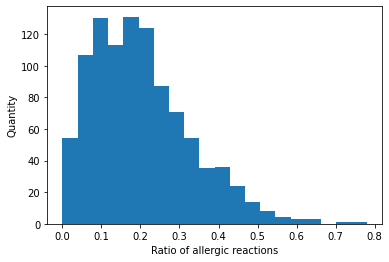

In [24]:
#Computing ratio of allergic reactions for each sample and create a histogram.
df = samples.draws_pd()

ratios = df['y'] / df['N']
plt.hist(ratios, bins=20)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Quantity')
plt.show()

In [25]:
np.mean(ratios)

0.19820000000000004

At first try with distribution p = beta_rng(2, 5) mean value was about p=28.5%, which was too high.
After changing the parameters to  p = beta_rng(2, 8) mean value is 19,8%, what is consistient with prior knowledge.  

Task 2

In [56]:
N = 50
y = 7
model = CmdStanModel(stan_file='/home/Lab3/code2.stan')
samples2 = model.sample(data={'N': N, 'y': y}, fixed_param=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:title={'center':'x'}>

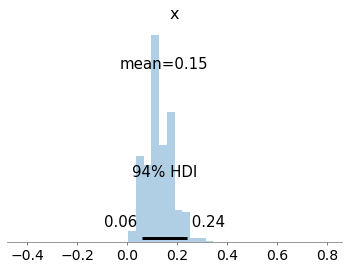

In [62]:
df2 = samples2.draws_pd()
ratio = df2['y_pred']/N
ratio = np.array(ratio)
az.plot_posterior(ratio, kind='hist', round_to=2)

In [65]:
ratio_hdi = np.percentile(ratio, [3,97])

# compute the expected value of the predicted ratio
ratio_mean = np.mean(ratio)

# compute the probability that ratio is lower than the average probability from traditional vaccines
traditional_prob = 0.2  # average probability from traditional vaccines
ratio_prob = np.mean(ratio < traditional_prob)

# print the results
print(f"Predicted ratio 94% HDI in range: {ratio_hdi}")
print(f"Predicted expected value: {ratio_mean}")
print(f"Probability of ratio < {traditional_prob}: {ratio_prob}")

Predicted ratio 94% HDI in range: [0.06 0.24]
Predicted expected value: 0.14540000000000003
Probability of ratio < 0.2: 0.809
